# Import Library


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

# Import Dataset

In [3]:
data = pd.read_csv("bank-additional-full.csv",sep=";")
test_data = pd.read_csv("bank-additional.csv",sep=";")

# Exploratory data analysis

> Girintili blok



In [4]:
data.shape

(41188, 21)

In [5]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# 4.Feature Engineering


## 4.1 Create categorical variable

4.1.1 Month, day of week, education and job

In [6]:
# training_data = pd.get_dummies(data,columns=["job","month","day_of_week","education","contact","poutcome","marital"])
# training_data


In [7]:
# without day of week
training_data = pd.get_dummies(data, columns=["job", "month", "education", "contact", "poutcome", "marital"])
training_data = training_data.drop(columns=['day_of_week'])  # Sütunu çıkarıp güncellenmiş veri çerçevesini atayın

test_data.isnull().sum()
final_test_data = pd.get_dummies(test_data, columns=["job", "month", "education", "contact", "poutcome", "marital"])
final_test_data = final_test_data.drop(columns=['day_of_week'])  # Sütunu çıkarıp güncellenmiş test veri çerçevesini atayın


In [8]:
# test_data.isnull().sum()
# final_test_data = pd.get_dummies(test_data,columns=["job","month","day_of_week","education","contact","poutcome","marital"])


## 4.2 Ordinal Number Encoding

In [9]:
dictionary={'yes':1,'no':0,'unknown':-1}
training_data['housing']=training_data['housing'].map(dictionary)
training_data['default']=training_data['default'].map(dictionary)
training_data['loan']=training_data['loan'].map(dictionary)

training_data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

final_test_data['housing']=final_test_data['housing'].map(dictionary)
final_test_data['default']=final_test_data['default'].map(dictionary)
final_test_data['loan']=final_test_data['loan'].map(dictionary)

final_test_data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

## 4.3 Encoding 999 in pdays as 0

In [10]:
training_data.loc[training_data['pdays'] == 999, 'pdays'] = 0
final_test_data.loc[final_test_data['pdays'] == 999, 'pdays'] = 0
training_data['pdays'].value_counts()

0     39688
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: pdays, dtype: int64

In [11]:
column_names = training_data.columns.tolist()
print(column_names)

['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown']


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# cols = ["age", "marital", "default", "housing", "loan", "contact", "duration", "campaign", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "job_admin.", "job_blue-collar", "job_entrepreneur", "job_housemaid", "job_management", "job_retired", "job_self-employed", "job_services", "job_student", "job_technician", "job_unemployed", "job_unknown", "month_apr", "month_aug", "month_dec", "month_jul", "month_jun", "month_mar", "month_may", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_mon", "day_of_week_thu", "day_of_week_tue", "day_of_week_wed", "education_basic.4y", "education_basic.6y", "education_basic.9y", "education_high.school", "education_illiterate", "education_professional.course", "education_university.degree", "education_unknown"]
# without day of week
cols = ["age", "marital", "default", "housing", "loan", "contact", "duration", "campaign", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "job_admin.", "job_blue-collar", "job_entrepreneur", "job_housemaid", "job_management", "job_retired", "job_self-employed", "job_services", "job_student", "job_technician", "job_unemployed", "job_unknown", "month_apr", "month_aug", "month_dec", "month_jul", "month_jun", "month_mar", "month_may", "month_nov", "month_oct", "month_sep", "education_basic.4y", "education_basic.6y", "education_basic.9y", "education_high.school", "education_illiterate", "education_professional.course", "education_university.degree", "education_unknown"]

X = training_data.drop(['y'],axis=1)
y = training_data["y"]

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=43)
rfe = rfe.fit(X,y)

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['default', 'housing', 'loan', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_retired', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'marital_divorced', 'marital_married', 'marital_single']


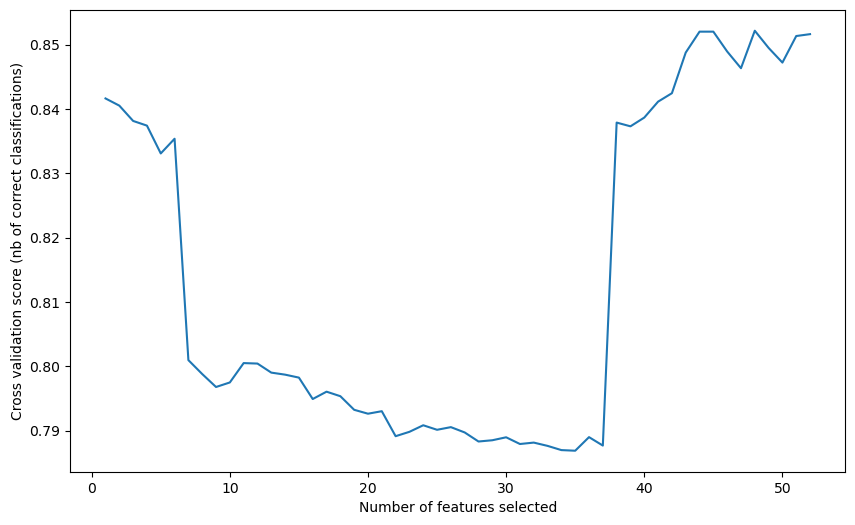

Optimal number of features: 48
Selected features: ['age', 'default', 'housing', 'loan', 'duration', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'marital_divorced', 'marital_married', 'marital_single']


In [15]:
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.show()

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))


In [13]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Optimal number of features: 48
Selected features: ['age', 'default', 'housing', 'loan', 'duration', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'marital_divorced', 'marital_married', 'marital_single']


In [14]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.show()

AttributeError: 'RFECV' object has no attribute 'cv_results_'

<Figure size 1000x600 with 0 Axes>

In [16]:
#selected_features = ['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'marital_divorced', 'marital_married', 'marital_single']

# without day of week
selected_features = ['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'marital_divorced', 'marital_married', 'marital_single']

X = training_data[selected_features]

corr = training_data.corr()
corr.style.background_gradient(cmap='PuBu')

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,marital_divorced,marital_married,marital_single,marital_unknown
age,1.000000,-0.164910,-0.000987,-0.006048,-0.000866,0.004594,0.018132,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399,-0.102584,-0.024191,0.031213,0.085403,0.062040,0.440772,-0.001356,-0.065731,-0.199749,-0.064383,-0.004426,0.047773,0.014285,0.065309,0.046563,-0.043563,-0.009532,0.008390,-0.067523,0.030045,0.053008,0.040889,0.244079,0.009897,-0.038320,-0.106550,0.017007,0.002054,-0.071138,0.069485,-0.007021,0.007021,-0.002537,-0.016376,0.035626,0.166125,0.271266,-0.411703,0.001062
default,-0.164910,1.000000,0.017429,0.007792,0.011478,-0.033077,0.067710,0.102630,-0.203061,-0.168335,-0.026249,-0.195079,-0.189544,0.099199,0.121106,-0.176739,0.000905,-0.036898,0.035372,-0.010186,0.004744,-0.017781,0.032542,0.069881,-0.009414,-0.055699,0.048880,0.009042,0.028791,-0.037813,-0.050294,0.051135,-0.067359,0.086104,0.060151,0.054667,-0.163763,-0.097116,-0.061718,0.053326,-0.009270,0.052137,0.142541,-0.055607,0.135698,-0.135698,0.073056,-0.104296,0.075683,0.024869,-0.130210,0.123414,0.007721
housing,-0.000987,0.017429,1.000000,0.228650,-0.004850,-0.009768,0.004608,0.017647,-0.055645,-0.079528,-0.033586,-0.054698,-0.040855,0.011379,0.012584,-0.016537,0.003680,-0.005278,-0.007348,-0.002593,-0.002491,-0.005234,0.003291,0.011875,0.006657,0.001030,0.028094,0.026802,0.004717,0.003681,-0.059010,0.012484,-0.022891,0.034204,0.001407,0.004991,-0.014761,-0.008449,-0.002680,-0.004606,0.002135,0.012344,0.014169,-0.006685,0.083498,-0.083498,0.017221,-0.021963,0.012824,-0.003822,-0.008748,0.012789,-0.006044
loan,-0.006048,0.007792,0.228650,1.000000,0.001987,0.004908,-0.001813,-0.003371,-0.000138,-0.011616,-0.015059,-0.001540,0.004260,-0.003142,0.021335,-0.008064,-0.005226,-0.003962,-0.001249,-0.007165,-0.008796,-0.001376,0.003078,-0.003090,-0.002922,0.006734,0.002487,0.001588,0.004369,0.018466,-0.017206,-0.003031,-0.002156,0.001314,-0.010063,-0.003521,-0.005258,-0.005993,-0.006821,0.001202,0.002043,-0.000240,0.013281,-0.005751,0.020520,-0.020520,-0.001759,0.000899,0.001262,-0.006703,0.000339,0.004227,0.001087
duration,-0.000866,0.011478,-0.004850,0.001987,1.000000,-0.071699,0.047853,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274,-0.008918,0.012992,0.003679,-0.004908,-0.001308,0.012421,0.004270,0.000142,0.014432,-0.013742,-0.005413,-0.006450,0.035185,-0.041889,0.022438,0.026819,-0.023351,-0.005516,0.008054,-0.015941,0.015454,0.018011,0.008476,0.005739,0.004810,0.005500,0.001491,-0.008472,-0.012641,0.003317,0.026657,-0.026657,-0.013311,-0.011665,0.044876,-0.006156,-0.004042,0.007808,0.009263
campaign,0.004594,-0.033077,-0.009768,0.004908,-0.071699,1.000000,-0.041984,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357,0.011745,-0.001775,-0.002203,0.004226,-0.009135,-0.006847,0.006361,0.002383,-0.024657,0.001557,-0.000200,0.002625,-0.058519,0.015009,-0.009819,0.098385,0.070144,-0.015244,-0.032704,-0.079028,-0.049126,-0.033953,0.004000,-0.000991,-0.005278,0.000195,-0.002188,0.002554,-0.000950,0.002162,-0.077368,0.077368,-0.068890,0.087645,-0.050893,0.005872,0.002332,-0.007624,0.009873
pdays,0.018132,0.067710,0.004608,-0.001813,0.047853,-0.041984,1.000000,0.485182,-0.218942,-0.041787,0.064192,-0.251822,-0.323122,0.267088,0.023282,-0.053833,-0.016289,-0.000171,-0.003496,0.055292,-0.014435,-0.028550

Train/Test split results:
LogisticRegression accuracy is 0.900
LogisticRegression log_loss is 0.281
LogisticRegression AUC is 0.784


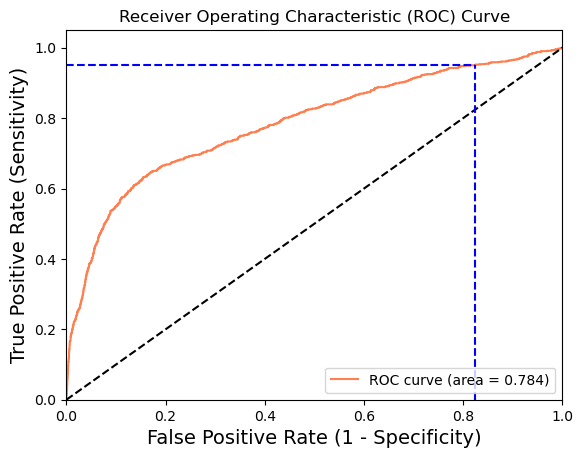

Using a threshold of 0.032 guarantees a sensitivity of 0.951 and a specificity of 0.175, i.e. a false positive rate of 82.47%.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create X (features) and y (response)
X = training_data[selected_features]
y = training_data['y']

# Use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions and predicted probabilities
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

# Find threshold index for 0.95 sensitivity
idx = np.min(np.where(tpr > 0.95))

# Print results
print("Train/Test split results:")
print(logreg.__class__.__name__ + " accuracy is %.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__ + " log_loss is %.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__ + " AUC is %.3f" % auc_score)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %.3f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1 - fpr[idx]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx]) * 100))


In [18]:
from sklearn.model_selection import cross_val_score
# Oluşturulan Logistic Regression modeli
logreg = LogisticRegression()

# 10-katlı çapraz doğrulama ile modelin performansını ölçümleme
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')

# Sonuçları ekrana yazdırma
print('10-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())


10-fold cross-validation results:
LogisticRegression average accuracy is 0.836
LogisticRegression average log_loss is 0.516
LogisticRegression average auc is 0.650


In [19]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.836 (+/-0.168)
LogisticRegression average log_loss: 0.516 (+/-0.528)
LogisticRegression average auc: 0.650 (+/-0.356)


What happens when we drop the duration?

In [20]:
training_data

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,marital_divorced,marital_married,marital_single,marital_unknown
0,56,0,0,0,261,1,0,0,1.1,93.994,...,0,0,1,0,1,0,0,1,0,0
1,57,-1,0,0,149,1,0,0,1.1,93.994,...,0,0,1,0,1,0,0,1,0,0
2,37,0,1,0,226,1,0,0,1.1,93.994,...,0,0,1,0,1,0,0,1,0,0
3,40,0,0,0,151,1,0,0,1.1,93.994,...,0,0,1,0,1,0,0,1,0,0
4,56,0,0,1,307,1,0,0,1.1,93.994,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,334,1,0,0,-1.1,94.767,...,0,1,0,0,1,0,0,1,0,0
41184,46,0,0,0,383,1,0,0,-1.1,94.767,...,0,1,0,0,1,0,0,1,0,0
41185,56,0,1,0,189,2,0,0,-1.1,94.767,...,0,1,0,0,1,0,0,1,0,0
41186,44,0,0,0,442,1,0,0,-1.1,94.767,...,0,1,0,0,1,0,0,1,0,0


In [21]:
#selected_features2 = ['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown']
# without day
selected_features2 = ['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown']

X = training_data[selected_features2]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, training_data[selected_features2], y, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.913 (+/-0.187)
LogisticRegression average log_loss: 0.429 (+/-1.103)
LogisticRegression average auc: 0.968 (+/-0.081)


##GridSearchCV evaluating using multiple scorers simultaneously

best params: LogisticRegression(C=0.10001)
best params: {'C': 0.10001}
best score: 0.924144716774077


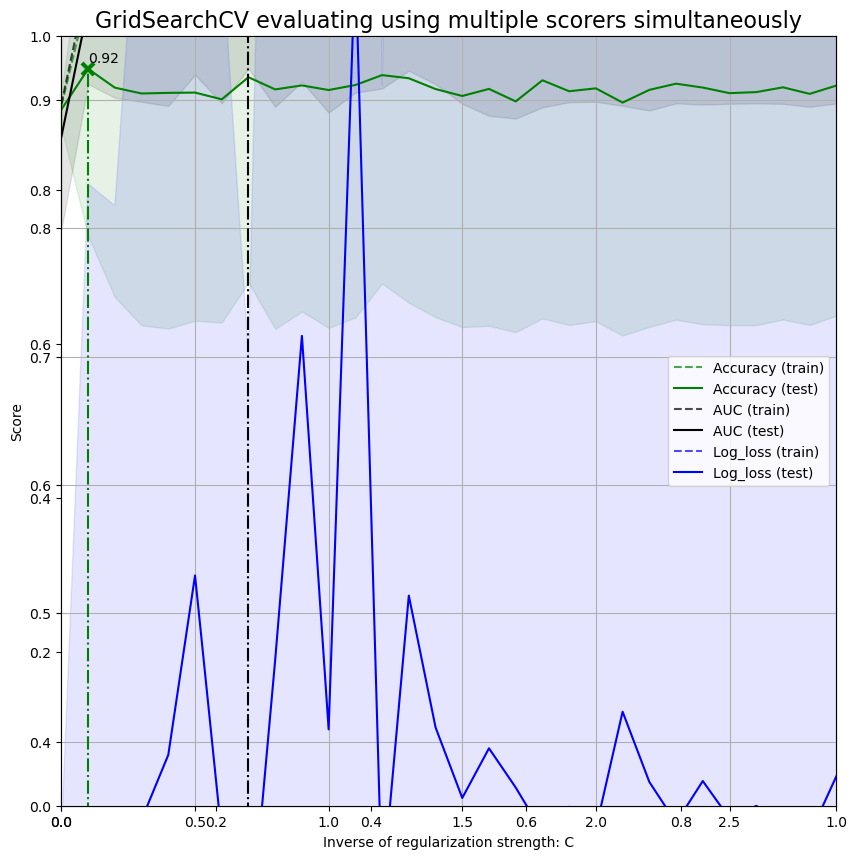

In [22]:
from sklearn.model_selection import GridSearchCV

X = training_data[selected_features2]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max())
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=2.7000100000000002))])
best params: {'clf__C': 2.7000100000000002}
best score: 0.9795690440060699
test score: 0.9830055838795824


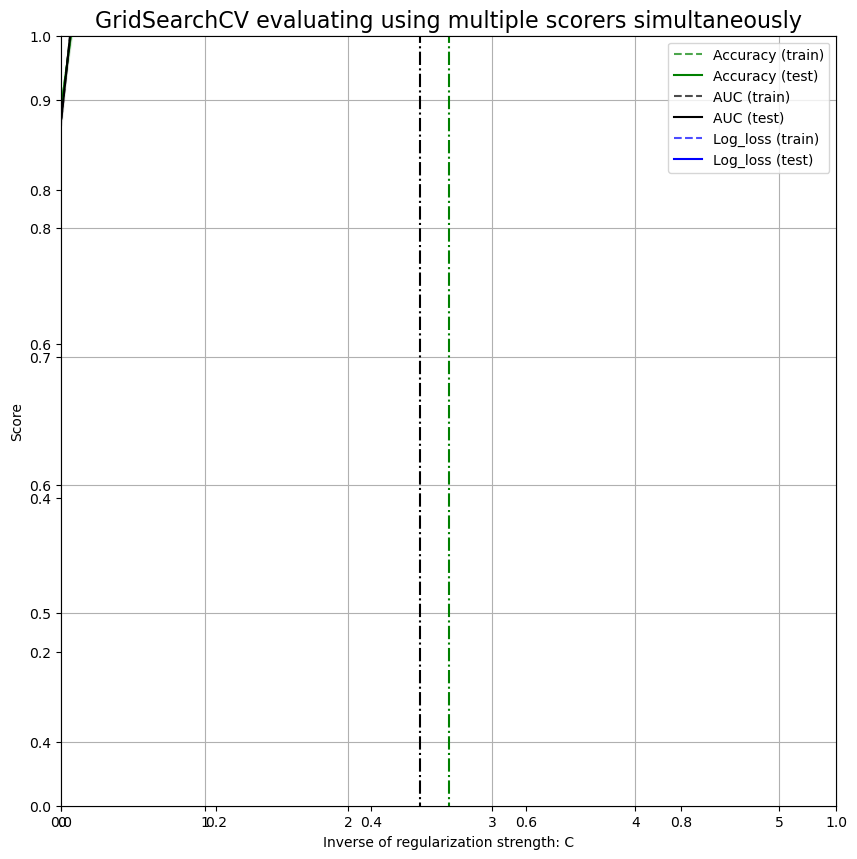

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# Gerekli kütüphaneleri içe aktarıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# Basit bir modeli tanımlıyoruz
C = np.arange(1e-05, 5.5, 0.1)  # C parametresi aralığı
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}  # Kullanılacak skorlama metrikleri
log_reg = LogisticRegression()  # Lojistik Regresyon modeli

# Basit ön işleme yöntemlerini tanımlıyoruz
std_scale = StandardScaler(with_mean=False, with_std=False)  # Standartlaştırma işlemi
# std_scale = StandardScaler()  # Alternatif bir standartlaştırma seçeneği

# Tekrarlı Stratified K Fold yöntemini tanımlıyoruz
n_folds = 5
n_repeats = 5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

# Basit bir boru hattı oluşturuyoruz ve GridSearchCV'yi tanımlıyoruz
log_clf_pipe = Pipeline(steps=[('scale', std_scale), ('clf', log_reg)])  # Standartlaştırma ve Lojistik Regresyon'u birleştirme
log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')  # C parametresi için GridSearchCV

# Modeli verilerle eğitiyoruz
log_clf.fit(X_train, y_train)
results = log_clf.cv_results_

# Test verileri üzerinde modeli değerlendiriyoruz
test_score = log_clf.score(X_test, y_test)

# Sonuçları yazdırıyoruz
print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('test score:', test_score)  # Test verileri üzerindeki skoru yazdırıyoruz
print('='*20)

# Skorları görselleştiriyoruz
plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max())
ax.set_ylim(0.35, 0.95)

X_axis = np.array(results['param_clf__C'].data, dtype=float)  # Parametre C değerleri

# Skorları çizdiriyoruz
for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

# Bu kod, Lojistik Regresyon modelinin hiperparametre optimizasyonunu gerçekleştirir
# ve sonuçları görselleştirir.
